***
# <span style="color:#0741ad">Import modules and set plotting standards</span>
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#setting up plotting standards for matplotlib and seaborn
params = {
    'axes.grid': True,
    'text.usetex' : False,
    'lines.markersize' :5,
}
plt.rcParams.update(params)

sns.set_style("whitegrid")
sns.set_context("notebook")

***
# <span style="color:#0741ad">Data Import, EDA and Preparation</span>
***

Before starting to use the actual machine learning algorithms we want to import our data, arrange it in a suitable format and perform some Exploratory Data Analysis (EDA).

In [3]:
#the data is contained in an Microsoft Excel .xlsx file
df=pd.read_excel("water_glycerol_viscosity_raw_data.xlsx") 

In [4]:
#The columns' labels represent the temperature of the mixture (°C)
#The first row contains the glycerol concentration (Wt %)
#E.g.: 1st row, 4th column correspond to pure water (Wt % Glyc=0) at 20 °C and the resulting viscosity is 1.005 cP
df.head()

,Unnamed: 0,0,10,20,30,40,50,60,70,80,90,100
0,0,1.792,1.308,1.005,0.8007,0.656,0.5494,0.4688,0.4061,0.3565,0.3165,0.2838
1,10,2.440,1.740,1.310,1.0300,0.826,0.6800,0.5750,0.5000,NaN,NaN,NaN
2,20,3.440,2.410,1.760,1.3500,1.070,0.8790,0.7310,0.6350,NaN,NaN,NaN
3,30,5.140,3.490,2.500,1.8700,1.460,1.1600,0.9560,0.8160,0.6900,NaN,NaN
4,40,8.250,5.370,3.720,2.7200,2.070,1.6200,1.3000,1.0900,0.9180,0.7630,0.6680


In [5]:
df.columns

Index(['Unnamed: 0', 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype='object')

In [6]:
#change the labels of the columns
new_columns=['Glyc Wt', 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [7]:
df.columns=new_columns
df.head()

,Glyc Wt,0,10,20,30,40,50,60,70,80,90,100
0,0,1.792,1.308,1.005,0.8007,0.656,0.5494,0.4688,0.4061,0.3565,0.3165,0.2838
1,10,2.440,1.740,1.310,1.0300,0.826,0.6800,0.5750,0.5000,NaN,NaN,NaN
2,20,3.440,2.410,1.760,1.3500,1.070,0.8790,0.7310,0.6350,NaN,NaN,NaN
3,30,5.140,3.490,2.500,1.8700,1.460,1.1600,0.9560,0.8160,0.6900,NaN,NaN
4,40,8.250,5.370,3.720,2.7200,2.070,1.6200,1.3000,1.0900,0.9180,0.7630,0.6680


In [8]:
#use the 'Glyc Wt' column as the index for the rows
df.set_index('Glyc Wt', inplace=True)
df.head()

,0,10,20,30,40,50,60,70,80,90,100
Glyc Wt,,,,,,,,,,,
0,1.792,1.308,1.005,0.8007,0.656,0.5494,0.4688,0.4061,0.3565,0.3165,0.2838
10,2.440,1.740,1.310,1.0300,0.826,0.6800,0.5750,0.5000,NaN,NaN,NaN
20,3.440,2.410,1.760,1.3500,1.070,0.8790,0.7310,0.6350,NaN,NaN,NaN
30,5.140,3.490,2.500,1.8700,1.460,1.1600,0.9560,0.8160,0.6900,NaN,NaN
40,8.250,5.370,3.720,2.7200,2.070,1.6200,1.3000,1.0900,0.9180,0.7630,0.6680


The data in our database is currently in a matrix form. We will use the *stack* method to re-arrange the data in a fashion suitable for ML algorithms. We will also get rid of the NaN values during the stacking operation.

In [9]:
df=df.stack(dropna=True).reset_index().rename(columns={'Glyc Wt':'Glyc Wt', 'level_1':'Temp', 0:'Visc'})

In [10]:
df.head()

,Glyc Wt,Temp,Visc
0,0,0,1.7920
1,0,10,1.3080
2,0,20,1.0050
3,0,30,0.8007
4,0,40,0.6560


In [11]:
df.describe() #count is 256=11 (# columns) * 24(# rows) - 8 (# of NaN entries)

,Glyc Wt,Temp,Visc
count,256.000000,256.000000,256.000000
mean,72.332031,48.710938,341.255663
std,28.844871,31.278296,1251.027849
min,0.000000,0.000000,0.283800
25%,60.000000,20.000000,3.075000
50%,85.000000,50.000000,14.300000
75%,95.000000,72.500000,77.925000
max,100.000000,100.000000,12070.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 3 columns):
Glyc Wt    256 non-null int64
Temp       256 non-null int64
Visc       256 non-null float64
dtypes: float64(1), int64(2)
memory usage: 6.1 KB


The [Seaborn library](https://seaborn.pydata.org/) allows us to perform powerful EDA with just a few lines of code. The plots below illustrate the highly non-linear relationship between the predictors and the response.

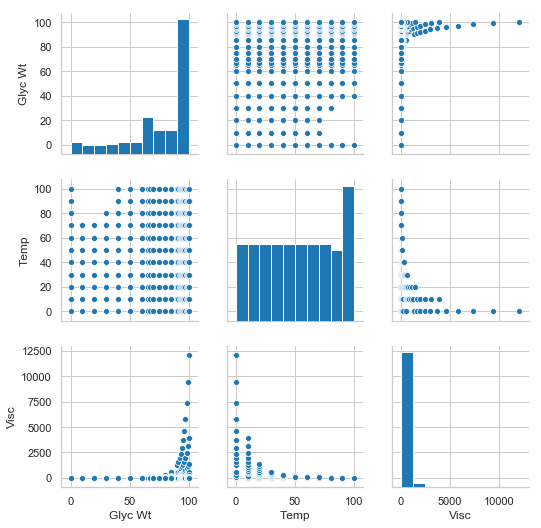

In [13]:
sns.pairplot(df)

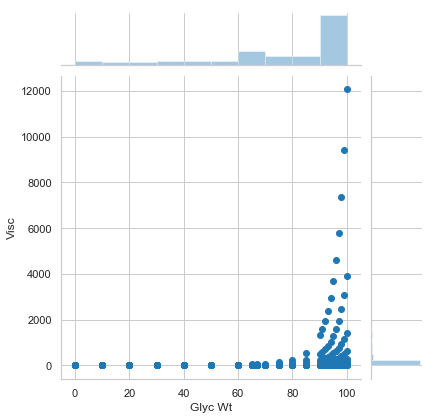

In [14]:
sns.jointplot(x='Glyc Wt', y='Visc', data=df)

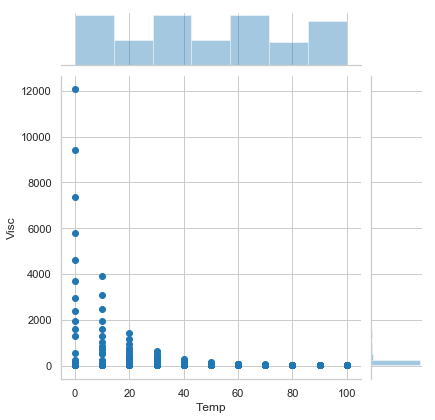

In [15]:
sns.jointplot(x='Temp', y='Visc', data=df)

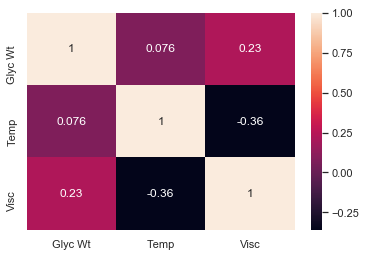

In [16]:
sns.heatmap(df.corr(),annot=True)

***
## <span style="color:#0741ad">Train-test split and normalisation of the features</span>
***

We will use 70% of the database to train the machine learning algorithms. The trained model will then be tested on the remaining 30% of the data in the inference step.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop('Visc',axis=1)
X.head()

,Glyc Wt,Temp
0,0,0
1,0,10
2,0,20
3,0,30
4,0,40


In [19]:
y=df['Visc']

In [20]:
#unscaled train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Some ML algorithms benefit from operating with [scaled features](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e). For this purpose, we will use the StandardScaler utility provided by SKLearn, which will scale the features in order to obtain a mean equal to zero and a standard deviation equal to to one.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
#scaled features (the warning can be safely ignored)
scaler = StandardScaler()
scaler.fit(X)
X_scaled_arr = scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled_arr,columns=X.columns)
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 2 columns):
Glyc Wt    256 non-null float64
Temp       256 non-null float64
dtypes: float64(2)
memory usage: 4.1 KB


C:\Users\Andrea\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andrea\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [23]:
X_scaled.describe()

,Glyc Wt,Temp
count,2.560000e+02,2.560000e+02
mean,2.732189e-16,-5.377643e-17
std,1.001959e+00,1.001959e+00
min,-2.512534e+00,-1.560390e+00
25%,-4.283669e-01,-9.197169e-01
50%,4.400361e-01,4.129341e-02
75%,7.873973e-01,7.620512e-01
max,9.610779e-01,1.642977e+00


In [24]:
#train-test split with scaled features
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.3, random_state=101)

***
# <span style="color:#0741ad"> Multivariable Linear Regression</span>
***

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
#linear regression coefficients
beta = np.append(lm.intercept_,lm.coef_)
beta

array([277.68032106,  11.73569113, -16.04181833])

***
## <span style="color:#0741ad">Perform ANOVA for the Linear Regression of the Training Set</span>
***

One of the main advantages of linear regression is its simplicity and readibility of the results, including the possibility of performing Analysis of Variance (ANOVA) to assess the performance of the regression and obtain useful information such as the *p-values* associated with each predictor. SKLearn does not come with a native tool to perform an ANOVA analysis, therefore we will use a in-house function contained in the *anova.py* file for this purpose. This function can be found in the [GitHub repository](https://github.com/AndreaDesan/MachineLearningForWaterGlycerolViscosity).

In [29]:
from anova import *

In [30]:
pred_lm_train=lm.predict(X_train)

In [31]:
anova_analysis(X_train,y_train,pred_lm_train,beta)

  Source of Var  DoF            SS           MS F-stat F-crit p-val  \
0    Regression    2  6.328873e+07  3.16444e+07  20.69   3.05     0   
1         Error  176  2.691263e+08  1.52913e+06                       
2         Total  178  3.324150e+08                                    

  H0 hypothesis       R2  
0         False  0.19039  
1                         
2                         
   Predictor  Coeff values      SE  T-stat  p-value  H0 hypothesis
0  intercept        277.68  276.82    1.00  0.31719           True
1    Glyc Wt         11.74    3.18    3.69  0.00029          False
2       Temp        -16.04    2.94   -5.45  0.00000          False


The outcome of the ANOVA analysis shows that both our predictors (i.e. the glycerol concentration and the temperature of the mixture) should be used when trying to predict the response (i.e. the viscosity of the mixture). We can now proceed to infer the response for the **test data**. Keep in mind that the algorithm has not been trained on this data, i.e. it has never "seen" the test data before.

In [32]:
pred_lm = lm.predict(X_test)

(0, 1000)

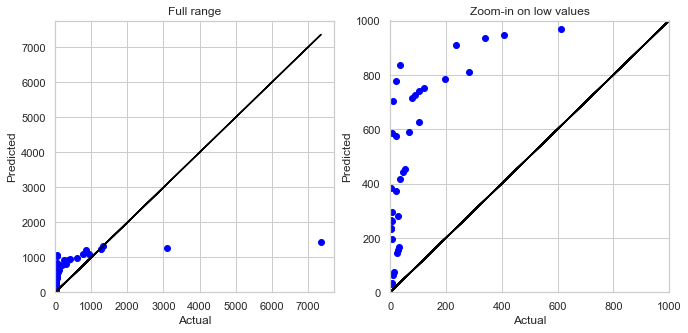

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].scatter(y_test,pred_lm,c='b')
axes[0].plot(y_test,y_test, 'k')
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].scatter(y_test,pred_lm,c='b')
axes[1].plot(y_test,y_test, 'k')
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])


Due the highly non-linear dependence of the viscosity on the predictors the linear regression is incapable of providing an accurate prediction of the response. We will now use some well-known statistical metrics to obtain a quantiative assessment of  the performance of our algorithm. The metrics we will be using are:
* Mean Absolute Error $MAE=\frac{1}{n}\sum_n \left| y_i - \hat{y}_i \right|$ 
* Mean Squared Error $MSE=\frac{1}{n}\sum_n \left( y_i - \hat{y}_i \right)^2$
* Root Mean Squared Error $RMSE=\sqrt{MSE}$
* Coefficient of determination $R^2=\frac{TSS-RSS}{TSS}$, which gives the proportion of the variability in the response that can be explained using the features in the linear regression

In the definition above, $TSS=\sum_n \left(y_i - \overline{y}_i\right)^2$ is the Total Sum of Squares and $RSS=\sum_n \left(y_i - \hat{y}_i\right)^2 $ is the Residual Sum of Squares.

We will evaluate these metrics using the *metrics* module of SKLearn. This module has been imported within the *anova.py* file. 

If we are **not overfitting** the training data, we would expect the performance of the model to be similar on the training and on the testing data. For this reason, we will also report the $R^2$ value obtained on the training data set.

In [34]:
lm_mae=metrics.mean_absolute_error(y_test, pred_lm)
print(f'MAE: {lm_mae:{1}.{5}}')
lm_mse=metrics.mean_squared_error(y_test, pred_lm)
print(f'MSE: {lm_mse:{1}.{5}}')
lm_rmse=np.sqrt(metrics.mean_squared_error(y_test, pred_lm))
print(f'RMSE: {lm_rmse:{1}.{5}}')
lm_r2=metrics.r2_score(y_test,pred_lm)
print(f'R2: {lm_r2:{1}.{4}}')
print(f'R2 train: {metrics.r2_score(y_train,pred_lm_train):{1}.{4}}')

lm_metrics=[lm_mae, lm_mse, lm_rmse, lm_r2]

MAE: 436.66
MSE: 6.706e+05
RMSE: 818.9
R2: 0.2137
R2 train: 0.1904


To conclude the linear regression section, we will use the advanced plotting library [plotly](https://plot.ly/) to create an interactive 3D plot of the predictions obtained with the linear regression against the actual test data.

In [35]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

from scipy.interpolate import griddata

In [36]:
glyc_max, glyc_min=X_test['Glyc Wt'].max(),X_test['Glyc Wt'].min()
temp_max, temp_min=X_test['Temp'].max(),X_test['Temp'].min()

In [37]:
glyci=np.linspace(glyc_min, glyc_max, 1000)
tempi=grid=np.linspace(temp_min, temp_max, 1000)
glyc_grid,temp_grid=np.meshgrid(glyci,tempi)

In [38]:
y_grid=griddata((X_test['Glyc Wt'],X_test['Temp']), pred_lm, (glyc_grid, temp_grid), method='cubic')

In [39]:
trace_reg=go.Surface(x=glyci, y=tempi, z=y_grid, opacity=0.7) #surface plot for the inferred response
trace_meas = go.Scatter3d( #scatter plot for the actual response
    x=X_test['Glyc Wt'],
    y=X_test['Temp'],
    z=y_test,
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        #line=dict(
        #    color='rgb(0, 0, 0)',
         #   width=2),
        color=y_test,                # set color to an array/list of desired values
        colorscale='RdBu',   # choose a colorscale
        opacity=0.8
    )
)
data=[trace_reg,trace_meas]

In [40]:
layout = go.Layout(title='Linear Regression - Test Data')

In [41]:
fig = go.Figure(data=data, layout=layout)

In [1]:
#plotly plots are beautiful but can get quite heavy, so they are not shown in this notebook
#uncomment the line below to generate the plot
#py.iplot(fig, filename='Linear Regression - Test Data')

***
# <span style="color:#0741ad">K-Nearest Neighbours</span>
***

In [43]:
from sklearn.neighbors import KNeighborsRegressor

The KNN algorithm requires the number of neighbours k as an input from the user. Parameters like *k*, which cannot be inferred from the training data, are referred to as *hyperparamters*. We will set *k*=1 as a first attempt. Succesively we will try to optimise the value of this hyperparamter.

In [44]:
knn=KNeighborsRegressor(n_neighbors=1)

In [45]:
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=1, p=2,
          weights='uniform')

In [46]:
pred_knn=knn.predict(X_test_scaled)

(0, 1000)

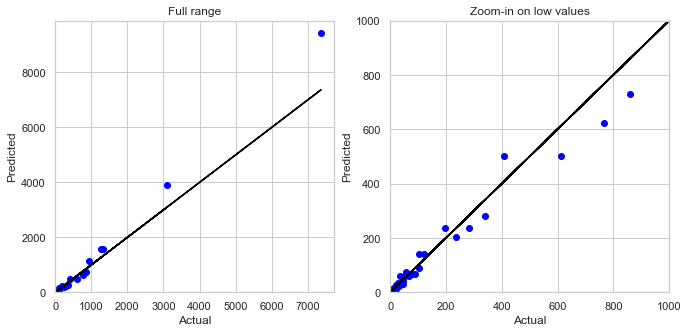

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].scatter(y_test,pred_knn,c='b')
axes[0].plot(y_test,y_test, 'k')
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].scatter(y_test,pred_knn,c='b')
axes[1].plot(y_test,y_test, 'k')
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])

Differently from the linear regression, the KNN does not make any a-priori assumption on the nature of the functional relationship between the predictors and the response, and therefore is more capable of dealing with the non-linar nature of the present case.

In [48]:
knn_mae=metrics.mean_absolute_error(y_test, pred_knn)
print(f'MAE: {knn_mae:{1}.{5}}')
knn_mse=metrics.mean_squared_error(y_test, pred_knn)
print(f'MSE: {knn_mse:{1}.{5}}')
knn_rmse=np.sqrt(metrics.mean_squared_error(y_test, pred_knn))
print(f'RMSE: {knn_rmse:{1}.{5}}')
knn_r2=metrics.r2_score(y_test,pred_knn)
print(f'R2: {knn_r2:{1}.{4}}')

pred_knn_train=knn.predict(X_train_scaled)
print(f'R2 train: {metrics.r2_score(y_train,pred_knn_train):{1}.{4}}')

knn_metrics=[knn_mae, knn_mse, knn_rmse, knn_r2]

MAE: 59.627
MSE: 6.6904e+04
RMSE: 258.66
R2: 0.9216
R2 train: 1.0


The non-negligible diffrence in the performance of the model between the train and the test data is a consequence of the well-known tendency of the KNN to overfit the training data for low values of *k*.

***
## <span style="color:#0741ad">KNN - Tuning of the Hyperparameter *k*</span>
***
The number of neighbours considered by the algorithm for the prediction of each data point is controlled by the hyperparameter *n_neighbors*. We will iterate through a range of values and select an optimal value which minimises a loss function (in this case, the MSE), following the so-called "elbow rule".

In [49]:
mse_it = []

for i in range(1,40):    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    mse_it.append(metrics.mean_squared_error(y_test, pred_i))
print(mse_it)

[66903.59215560468, 6332.99488528669, 47851.4977703753, 22768.895162952165, 19331.54060368689, 42736.68988276138, 80407.03351531997, 126519.03866938548, 186984.45310611842, 160949.54635792, 168488.3771429332, 167492.80994199018, 205532.6725083363, 214296.45915593466, 226116.12791725848, 240381.5756560545, 254299.91238068175, 267450.2893784317, 285660.6197228657, 302955.67562388454, 306201.1347631862, 312869.5165041554, 329612.1329104415, 338932.28227563045, 354134.0805927764, 362928.41545104305, 394164.21199386776, 399083.43507861934, 404769.8852005314, 410951.3725573699, 418327.01980077045, 425782.512423626, 433184.7932066703, 444995.75224165665, 454654.34231829847, 461152.9846796134, 474688.9518570814, 481073.81506473763, 487292.72751209524]


Text(0, 0.5, 'MSE')

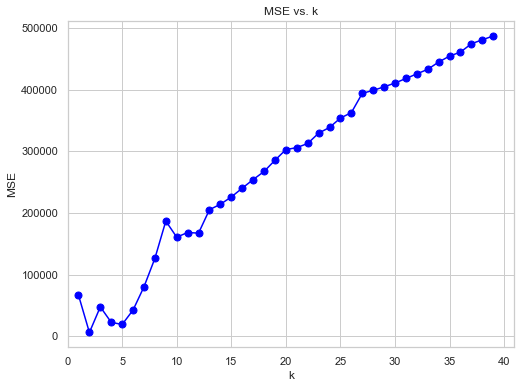

In [50]:
plt.figure(figsize=(8,6))
plt.plot(range(1,40),mse_it,color='blue', marker='o', markersize=7)
plt.title('MSE vs. k')
plt.xlim(left=0)
plt.xlabel('k')
plt.ylabel('MSE')

If we want to minimise the MSE, we should select *k=2*. Let's go ahead and create an 'optimised' KNN regressor with *k=2* and compare the results for the test data against our first guess *k=1*.

In [51]:
knn_opt=KNeighborsRegressor(n_neighbors=2)
knn_opt.fit(X_train_scaled,y_train)
pred_knn_opt=knn_opt.predict(X_test_scaled)

(0, 1000)

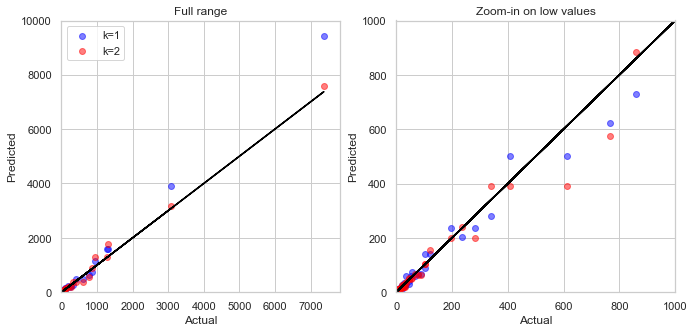

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].plot(y_test,y_test, 'k', label='_nolegend_')
axes[0].scatter(y_test,pred_knn,c='b', label='k=1', alpha=0.5)
axes[0].scatter(y_test,pred_knn_opt, c='r', label='k=2', alpha=0.5)
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].legend(loc='best')
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].plot(y_test,y_test, 'k', label='_nolegend_')
axes[1].scatter(y_test,pred_knn,c='b', label='k=1', alpha=0.5)
axes[1].scatter(y_test,pred_knn_opt, c='r', label='k=2', alpha=0.5)
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[0].legend(loc='best')
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])

***
# <span style="color:#0741ad">Decision Tree and Random Forest</span>
***
We will use a single decision tree first, and then swtich to a random forest regressor.

***
## <span style="color:#0741ad">Single Decision Tree</span>
***
We will deliberately limit the *max_depth* of the tree to 5 in order to avoid very complex trees.

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
dt=DecisionTreeRegressor(max_depth=5,random_state=101)

In [55]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=101, splitter='best')

In [56]:
pred_dt=dt.predict(X_test)

(0, 1000)

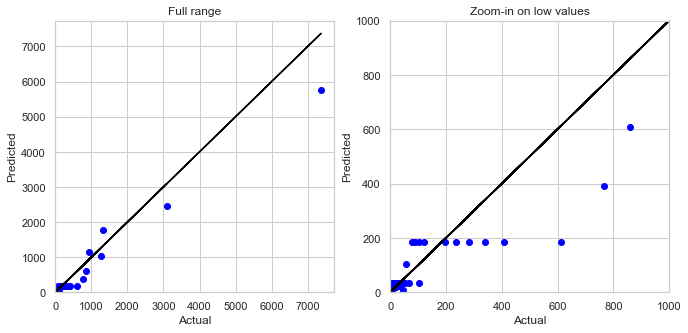

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].scatter(y_test,pred_dt,c='b')
axes[0].plot(y_test,y_test, 'k')
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].scatter(y_test,pred_dt,c='b')
axes[1].plot(y_test,y_test, 'k')
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])

In [58]:
dt_mae=metrics.mean_absolute_error(y_test, pred_dt)
print(f'MAE: {dt_mae:{1}.{5}}')
dt_mse=metrics.mean_squared_error(y_test, pred_dt)
print(f'MSE: {dt_mse:{1}.{5}}')
dt_rmse=np.sqrt(metrics.mean_squared_error(y_test, pred_dt))
print(f'RMSE: {dt_rmse:{1}.{5}}')
dt_r2=metrics.r2_score(y_test,pred_dt)
print(f'R2: {dt_r2:{1}.{4}}')

pred_dt_train=dt.predict(X_train)
print(f'R2 train: {metrics.r2_score(y_train,pred_dt_train):{1}.{4}}')

dt_metrics=[dt_mae, dt_mse, dt_rmse, dt_r2]

MAE: 74.843
MSE: 4.9219e+04
RMSE: 221.85
R2: 0.9423
R2 train: 0.9981


Decision trees and random forest are powerful algorithms but, as their complexity increases, they can become difficult to interpret. One way to try and make some sense out of them is to plot a visual representation of the tree. The tree generated above has too many layers to create a readable plot so let's try and reduce the depth of the tree.

In [59]:
dt_bonsai=DecisionTreeRegressor(max_depth=2,random_state=101)
dt_bonsai.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=101, splitter='best')

In [60]:
pred_dt_bonsai = dt_bonsai.predict(X_test)

(0, 1000)

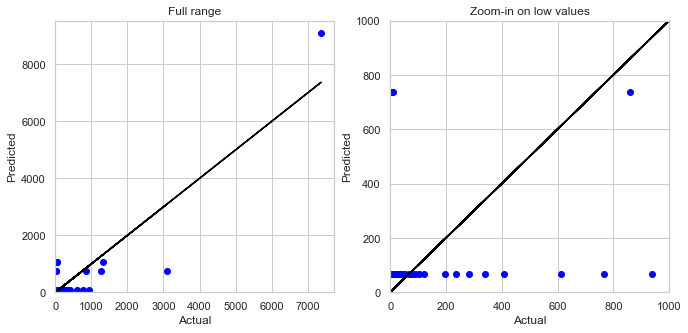

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].scatter(y_test,pred_dt_bonsai,c='b')
axes[0].plot(y_test,y_test, 'k')
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].scatter(y_test,pred_dt_bonsai,c='b')
axes[1].plot(y_test,y_test, 'k')
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])

In [62]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns)
features

['Glyc Wt', 'Temp']

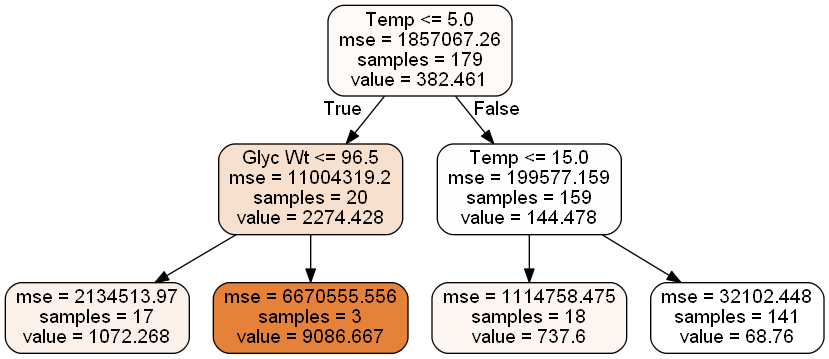

In [63]:
dot_data = StringIO()  
export_graphviz(dt_bonsai, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

The top node is the so called *root node*. The 4 nodes at the bottom are *leaf nodes*. Each node contains the criterion (i.e. feature and value to split the node on), the number of data points in each node, the associated MSE and the predicted value associated with all data points in a given node. 

The original tree with *max_depth*=5 is shown below:

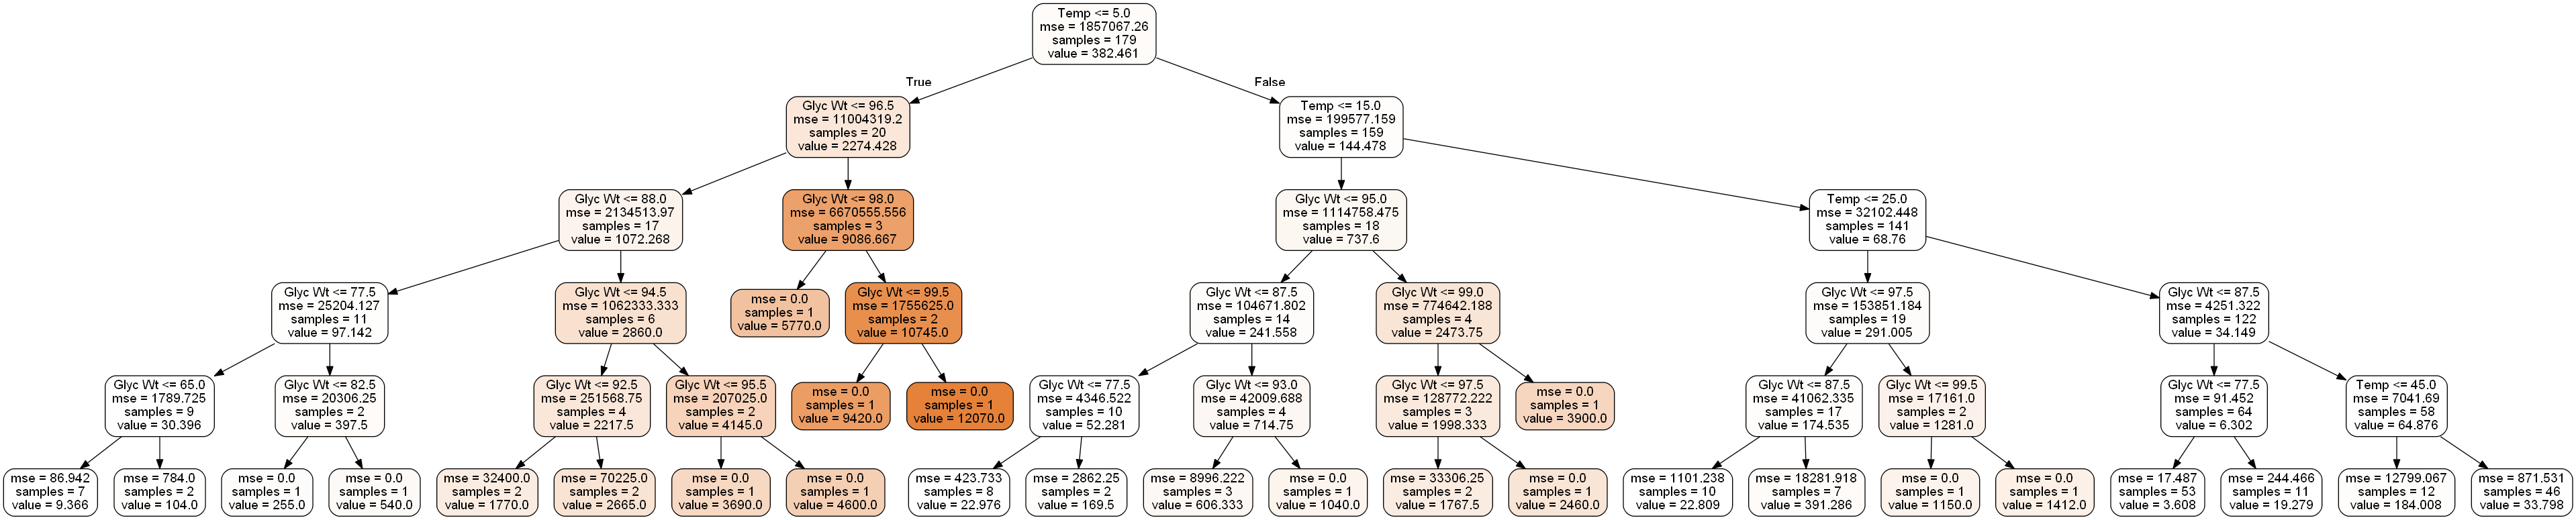

In [64]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

***
## <span style="color:#0741ad">Random Forest</span>
***

Also in this case we set a *max_depth=5* for each single tree within the forest. The number of trees in the forest (*n_estimators*) is taken equal to 10. Theoretically these hyperparameters should be optimised similarly to what we have done for the hyperparameter *k* for the KNN algorithm. An increased number of hyperparameters is the price to pay for using more complex algorithms. These tendency will become even more dramatic when we will use Support Vector Machines and Artificial Neural Networks in the next sections. When dealing with a large numebr of hyperparameters, SKLearn provides the user with a powerful tool called [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), to automate the optimisation of the model. To keep this notebook simple, we will not use GridSearch to optimise the values of the hyperparameters for our algorithms. 

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, max_depth=5,random_state=101)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [66]:
pred_rf = rf.predict(X_test)

(0, 1000)

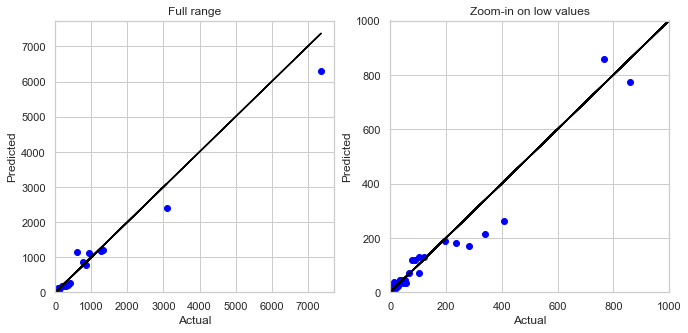

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].scatter(y_test,pred_rf,c='b')
axes[0].plot(y_test,y_test, 'k')
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].scatter(y_test,pred_rf,c='b')
axes[1].plot(y_test,y_test, 'k')
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])

In [68]:
rf_mae=metrics.mean_absolute_error(y_test, pred_rf)
print(f'MAE: {rf_mae:{1}.{5}}')
rf_mse=metrics.mean_squared_error(y_test, pred_rf)
print(f'MSE: {rf_mse:{1}.{5}}')
rf_rmse=np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
print(f'RMSE: {rf_rmse:{1}.{5}}')
rf_r2=metrics.r2_score(y_test,pred_rf)
print(f'R2: {rf_r2:{1}.{4}}')

pred_rf_train=rf.predict(X_train)
print(f'R2 train: {metrics.r2_score(y_train,pred_rf_train):{1}.{4}}')

rf_metrics=[rf_mae, rf_mse, rf_rmse, rf_r2]

MAE: 49.246
MSE: 2.6426e+04
RMSE: 162.56
R2: 0.969
R2 train: 0.9827


***
### <span style="color:#0741ad">1.4.2.1 Plotting a Decision Tree Within a Random Forest</span>
***
The decision trees making up the forest are:

In [69]:
rf.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=70431583, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=225658379, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=303514961, splitter='best'),
 DecisionTreeRegressor(criterion

In [70]:
len(rf.estimators_) #is equal to the sepcified n_estimators

10

In [71]:
#grab a tree within the forest
tree=rf.estimators_[2]

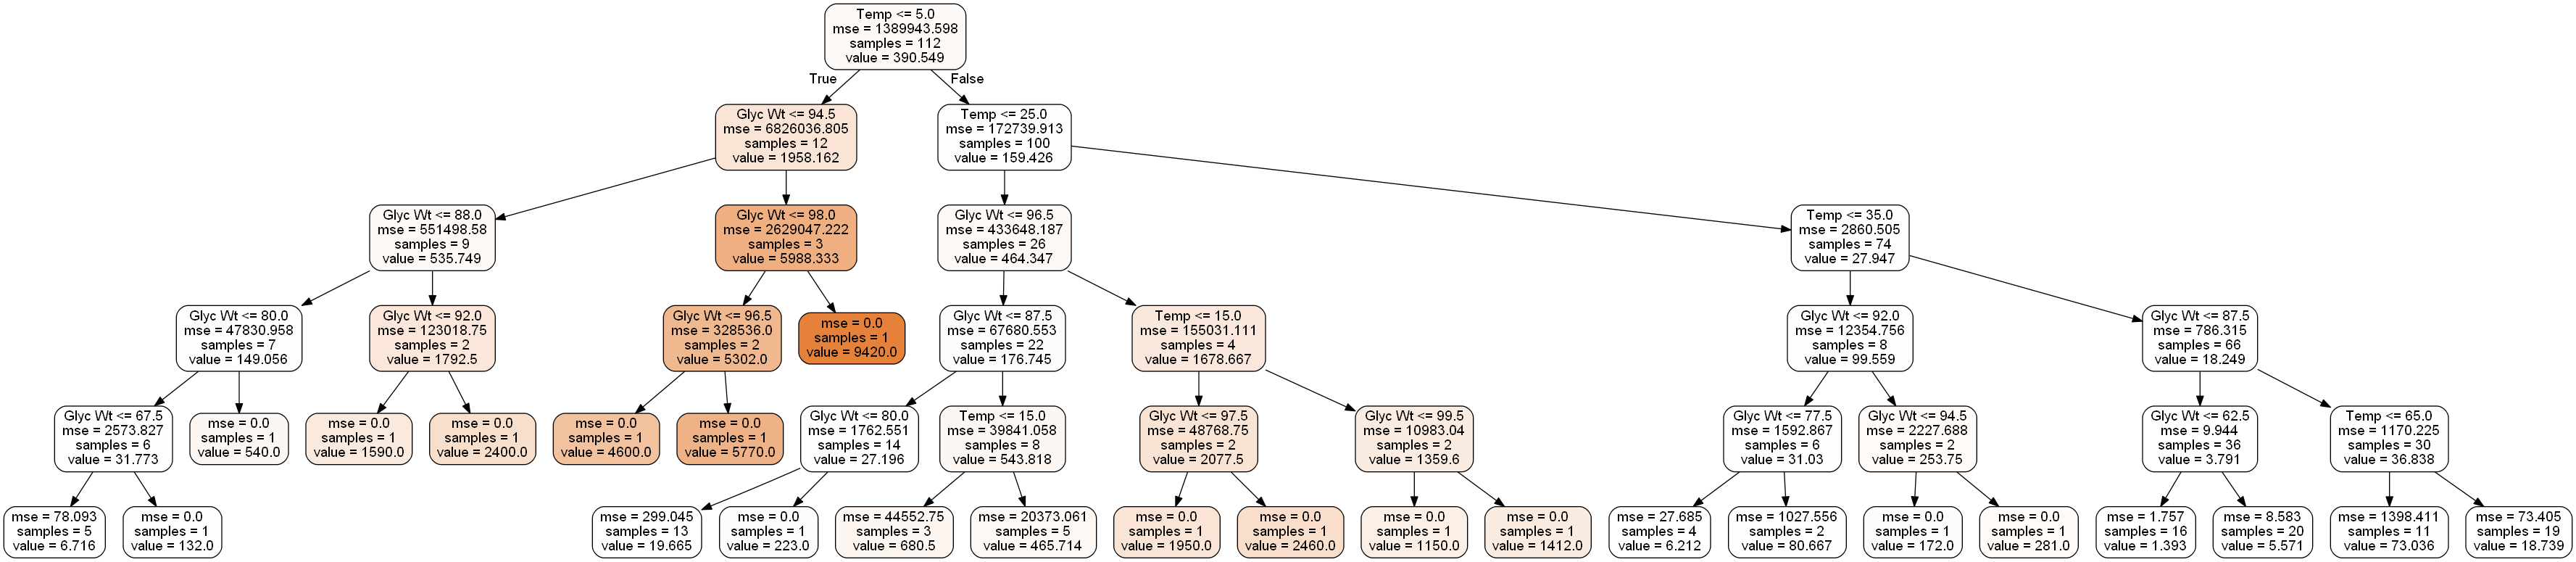

In [72]:
#plot the tree
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

***
# <span style="color:#0741ad">Support Vector Machine</span>
***

In [73]:
from sklearn.svm import SVR

We will use an educated guess for the hypeparameters. In this case we will **not** perform an optimisation of the hyperparameters using GridSearch.

In [74]:
svr=SVR(C=10000,gamma=1.0, kernel='rbf')

In [75]:
svr.fit(X_train_scaled,y_train)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
pred_svr=svr.predict(X_test_scaled)

(0, 1000)

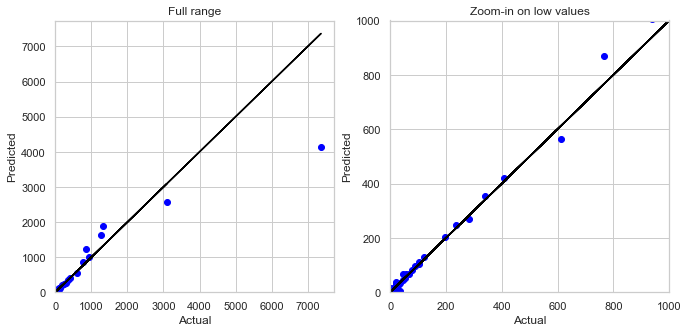

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].scatter(y_test,pred_svr,c='b')
axes[0].plot(y_test,y_test, 'k')
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].scatter(y_test,pred_svr,c='b')
axes[1].plot(y_test,y_test, 'k')
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])

In [78]:
svm_mae=metrics.mean_absolute_error(y_test, pred_svr)
print(f'MAE: {svm_mae:{1}.{5}}')
svm_mse=metrics.mean_squared_error(y_test, pred_svr)
print(f'MSE: {svm_mse:{1}.{5}}')
svm_rmse=np.sqrt(metrics.mean_squared_error(y_test, pred_svr))
print(f'RMSE: {svm_rmse:{1}.{5}}')
svm_r2=metrics.r2_score(y_test,pred_svr)
print(f'R2: {svm_r2:{1}.{4}}')

pred_svr_train=svr.predict(X_train_scaled)
print(f'R2 train: {metrics.r2_score(y_train,pred_svr_train):{1}.{4}}')

svm_metrics=[svm_mae, svm_mse, svm_rmse, svm_r2]

MAE: 73.243
MSE: 1.4667e+05
RMSE: 382.98
R2: 0.828
R2 train: 0.7431


***
# <span style="color:#0741ad">Artificial Neural Network</span>
***

We will now use our training data to train an ANN and then infer the value of the reponse in the test data. We will use the Multi-Layer Perceptron (MLP) regressor available in SKLearn to generate our ANN. MLPs are a class of simple feed-forward NN. A comprehensive overview of the different architerctures used in NNs can be seen [here](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464).

Also in this case we will not perform a GridSearch to optimise the hyperparameters; an educated guess based on the author's previous experience with similar cases will be used instead.

In [79]:
from sklearn.neural_network import MLPRegressor

In [80]:
ann=MLPRegressor(hidden_layer_sizes=(35,20,5), alpha=0.0001, max_iter=5000,random_state=101, solver='lbfgs')

In [81]:
ann.fit(X_train_scaled,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(35, 20, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=101, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [82]:
pred_ann=ann.predict(X_test_scaled)

(0, 1000)

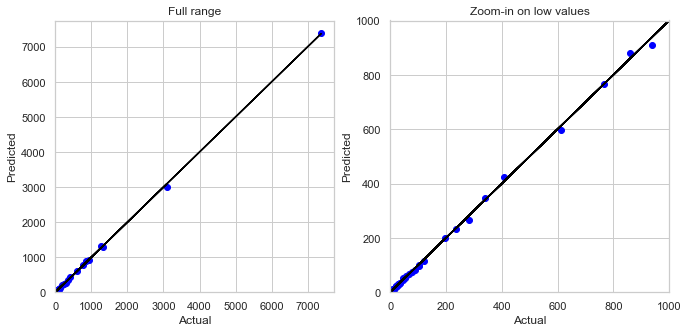

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].scatter(y_test,pred_ann,c='b')
axes[0].plot(y_test,y_test, 'k')
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].scatter(y_test,pred_ann,c='b')
axes[1].plot(y_test,y_test, 'k')
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])

In [84]:
ann_mae=metrics.mean_absolute_error(y_test, pred_ann)
print(f'MAE: {ann_mae:{1}.{5}}')
ann_mse=metrics.mean_squared_error(y_test, pred_ann)
print(f'MSE: {ann_mse:{1}.{5}}')
ann_rmse=np.sqrt(metrics.mean_squared_error(y_test, pred_ann))
print(f'RMSE: {ann_rmse:{1}.{5}}')
ann_r2=metrics.r2_score(y_test,pred_ann)
print(f'R2: {ann_r2:{1}.{4}}')

pred_ann_train=ann.predict(X_train_scaled)
print(f'R2 train: {metrics.r2_score(y_train,pred_ann_train):{1}.{4}}')

ann_metrics=[ann_mae, ann_mse, ann_rmse, ann_r2]

MAE: 4.7579
MSE: 192.24
RMSE: 13.865
R2: 0.9998
R2 train: 1.0


We will use plotly again to create a 3D interactive visualisation of the regression performed with the optimised ANN.

In [85]:
y_grid_ann=griddata((X_test['Glyc Wt'],X_test['Temp']), pred_ann, (glyc_grid, temp_grid), method='cubic')

In [86]:
trace_ann=go.Surface(x=glyci, y=tempi, z=y_grid_ann, opacity=0.7)

In [87]:
data_ann=[trace_ann,trace_meas]

In [88]:
layout_ann = go.Layout(title='ANN - Test Data')

In [89]:
fig_ann = go.Figure(data=data_ann, layout=layout_ann)

In [1]:
#this plot is quite heavy - uncomment the line below and compile the cell to show it
#py.iplot(fig_ann, filename='ANN - Test Data')

***
# <span style="color:#0741ad">Assessment of the Algorithms</span>
***
Now let's summarise the performance of the different algorithms for the given problem.

In [91]:
alg_list=['Linear reg', 'KNN', 'Random Forest', 'SVM', 'ANN']

In [92]:
metrics_list=['MAE', 'MSE', 'RMSE', 'R2']

In [93]:
summ=np.array([lm_metrics, knn_metrics, rf_metrics, svm_metrics, ann_metrics])
summ

array([[4.36656504e+02, 6.70602943e+05, 8.18903500e+02, 2.13668782e-01],
       [5.96269948e+01, 6.69035922e+04, 2.58657287e+02, 9.21550623e-01],
       [4.92462039e+01, 2.64255465e+04, 1.62559363e+02, 9.69014105e-01],
       [7.32425072e+01, 1.46671037e+05, 3.82976549e+02, 8.28017434e-01],
       [4.75788810e+00, 1.92240835e+02, 1.38650941e+01, 9.99774583e-01]])

In [94]:
summ[:,0]=np.round(summ[:,0],2)
summ[:,1]=np.round(summ[:,1],0)
summ[:,2]=np.round(summ[:,2],2)
summ[:,3]=np.round(summ[:,3],4)

In [95]:
summary=pd.DataFrame(data=summ,index=alg_list,columns=metrics_list)
summary

,MAE,MSE,RMSE,R2
Linear reg,436.66,670603.0,818.90,0.2137
KNN,59.63,66904.0,258.66,0.9216
Random Forest,49.25,26426.0,162.56,0.9690
SVM,73.24,146671.0,382.98,0.8280
ANN,4.76,192.0,13.87,0.9998


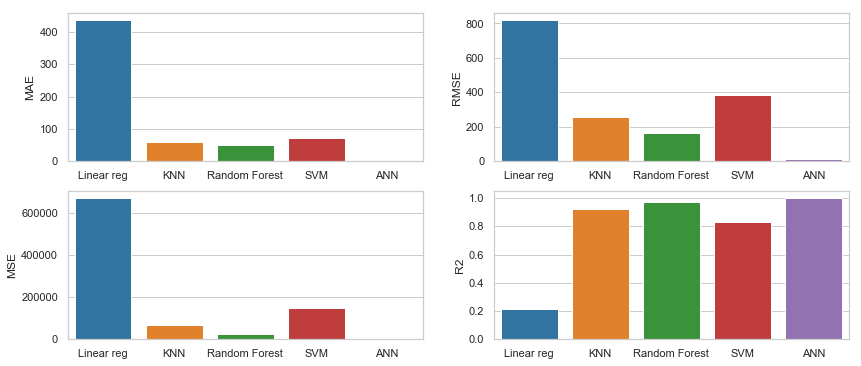

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
sns.barplot(x=alg_list,y=summary['MAE'],ax=axes[0][0])
sns.barplot(x=alg_list,y=summary['MSE'],ax=axes[1][0])
sns.barplot(x=alg_list,y=summary['RMSE'],ax=axes[0][1])
sns.barplot(x=alg_list,y=summary['R2'],ax=axes[1][1])

Due to the highly non-linear relationship between the predictors and the response, the linear regression is not a suitable algorithm for this case. The other non-parametric algorithms, on the other hand, provide a reasonable prediction of the response for the test data. In particular, the ANN is in an excellent agreement with the actual response values.

***
# <span style="color:#0741ad">Comparison of ML Algorithms Against a Correlation from the Literature</span>
*** 

In this section we will compare the machine learning algorithms against a correlation for the viscosity of the water-glycerol mixtures reported in Cheng, N.S., *Formula for the viscosity of a water-glycerol mixture*, Industrial & Engineering Chemistry Research, 47, 3285-3288 (2008).

The function below calculates the viscosity of the mixture as a function of the temperature and of the glycerol concentration using the correlation proposed in the paper mentioned above.

In [97]:
def mu_mixt_cheng(t_degc, y_glyc):
    '''
    Calculates the viscosity of the water-glycerol mixture following Cheng (2008). Arguments are:
    t_degc: temperature of the mixture in °C
    y_glyc: mass fraction of the glycerol within the mixture
    '''
    y_glyc=y_glyc/100
    
    mu_water=1.790*np.exp(((-1230.0-t_degc)*t_degc)/(36100+360*t_degc))
    mu_glyc=12100*np.exp(((-1233+t_degc)*t_degc)/(9900+70*t_degc))
    
    a_mu=0.705-0.0017*t_degc
    
    b_mu=(4.9+0.036*t_degc)*pow(a_mu,2.5)
    
    alpha_mu= 1-y_glyc+(a_mu*b_mu*y_glyc*(1-y_glyc))/(a_mu*y_glyc+b_mu*(1-y_glyc))
    
    return pow(mu_water,alpha_mu)*pow(mu_glyc,(1-alpha_mu))

We will now use the *map* function to obtain the viscosity values predicted with Cheng's correlation for the data points contained in our test data, and assess the results in the same way as we have done for the ML algorithms.

In [98]:
pred_cheng=list(map(mu_mixt_cheng,X_test['Temp'].values,X_test['Glyc Wt'].values))

(0, 1000)

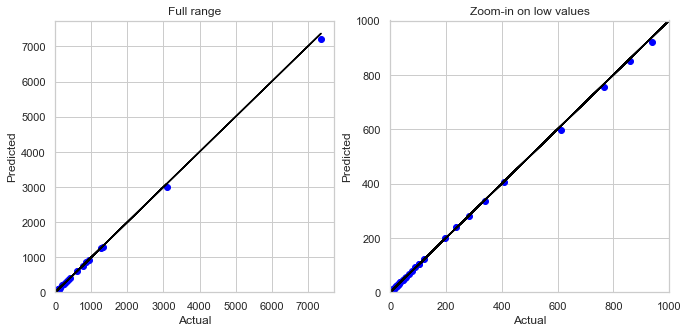

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].scatter(y_test,pred_cheng,c='b')
axes[0].plot(y_test,y_test, 'k')
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].axis('tight')
axes[0].set_title("Full range")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)

axes[1].scatter(y_test,pred_cheng,c='b')
axes[1].plot(y_test,y_test, 'k')
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
axes[1].axis('tight')
axes[1].set_title("Zoom-in on low values")
axes[1].set_ylim([0, 1000])
axes[1].set_xlim([0, 1000])

In [100]:
cheng_mae=metrics.mean_absolute_error(y_test, pred_cheng)
print(f'MAE: {cheng_mae:{1}.{5}}')
cheng_mse=metrics.mean_squared_error(y_test, pred_cheng)
print(f'MSE: {cheng_mse:{1}.{5}}')
cheng_rmse=np.sqrt(metrics.mean_squared_error(y_test, pred_cheng))
print(f'RMSE: {cheng_rmse:{1}.{5}}')
cheng_r2=metrics.r2_score(y_test,pred_cheng)
print(f'R2: {cheng_r2:{1}.{4}}')

cheng_metrics=[cheng_mae, cheng_mse, cheng_rmse, cheng_r2]

MAE: 4.7284
MSE: 427.27
RMSE: 20.67
R2: 0.9995


In [101]:
summ_cheng=np.array([lm_metrics, knn_metrics, rf_metrics, svm_metrics, ann_metrics, cheng_metrics])
alg_list_cheng=['Linear reg', 'KNN', 'Random Forest', 'SVM', 'ANN','Cheng']
summ_cheng[:,0]=np.round(summ_cheng[:,0],2)
summ_cheng[:,1]=np.round(summ_cheng[:,1],0)
summ_cheng[:,2]=np.round(summ_cheng[:,2],2)
summ_cheng[:,3]=np.round(summ_cheng[:,3],4)
summary_cheng=pd.DataFrame(data=summ_cheng,index=alg_list_cheng,columns=metrics_list)
summary_cheng

,MAE,MSE,RMSE,R2
Linear reg,436.66,670603.0,818.90,0.2137
KNN,59.63,66904.0,258.66,0.9216
Random Forest,49.25,26426.0,162.56,0.9690
SVM,73.24,146671.0,382.98,0.8280
ANN,4.76,192.0,13.87,0.9998
Cheng,4.73,427.0,20.67,0.9995


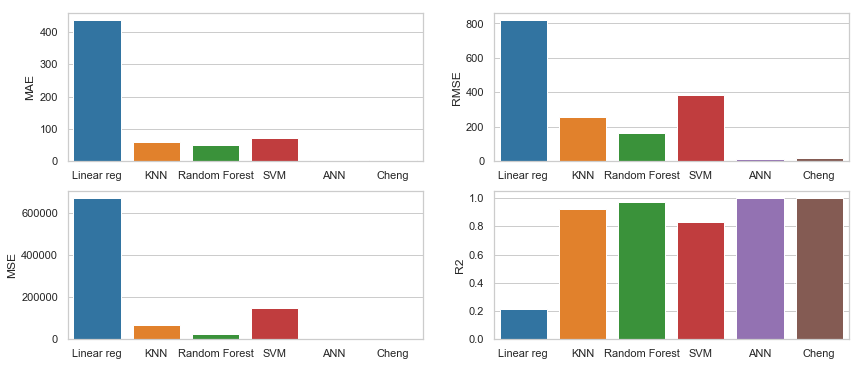

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
sns.barplot(x=alg_list_cheng,y=summary_cheng['MAE'],ax=axes[0][0])
sns.barplot(x=alg_list_cheng,y=summary_cheng['MSE'],ax=axes[1][0])
sns.barplot(x=alg_list_cheng,y=summary_cheng['RMSE'],ax=axes[0][1])
sns.barplot(x=alg_list_cheng,y=summary_cheng['R2'],ax=axes[1][1])